In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib

In [79]:
df = pd.read_csv("../data/cleaned_fraud_dataset.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [80]:
numeric_features = ['distance_from_home',
                    'distance_from_last_transaction',
                    'ratio_to_median_purchase_price']

df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [81]:
X = df.drop("fraud", axis=1)
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=29)


In [82]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=29,
    use_label_encoder=False,
)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]


/Users/r3nexe/Desktop/Fraud Detection/pvenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:30:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [83]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[182376    143]
 [   185  17296]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182519
           1       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000


ROC-AUC: 0.9999754446998887


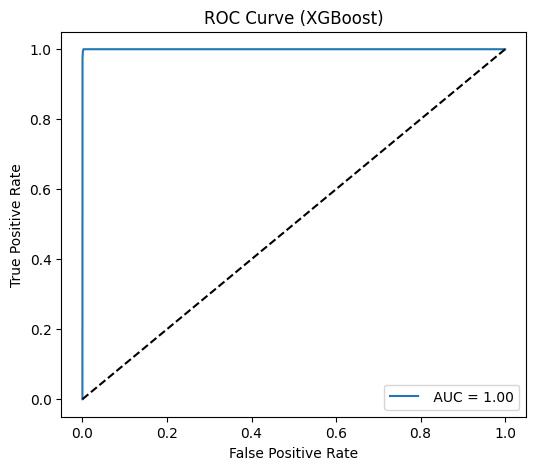

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f" AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend()
plt.show()

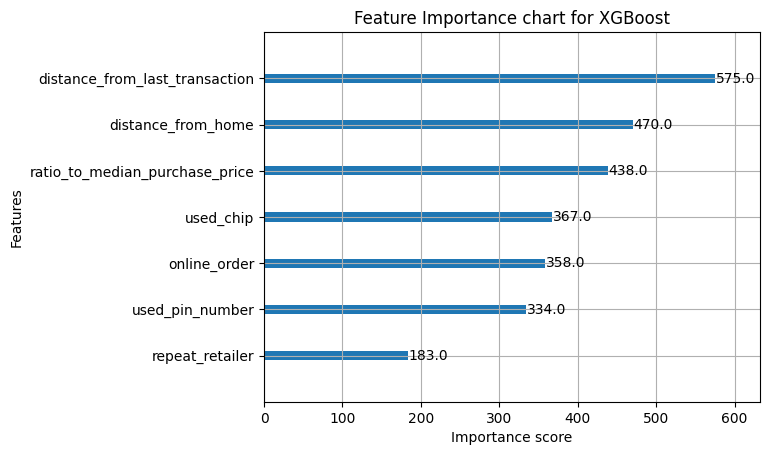

In [85]:
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Feature Importance chart for XGBoost")
plt.show()

In [86]:
X_train.columns.tolist()

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [87]:
joblib.dump(xgb_model,'../models/xgb_model.pkl')
joblib.dump(scaler,'../models/scaler.pkl')

feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "../models/feature_names.pkl")

['../models/feature_names.pkl']